# Comparision of snoTEL forcing data files 
This document shows a workflow that compares data from raw snoTEL output, GHCND (global historical climatalogical network daily), and the department of energy bcqc data

## Goals
* Learn more about working with big data and jupyter notebooks
* Track down any unit and or other silly errors in my current setup
* Teach others about the use of QC on snoTEL data

In [77]:
# load all the necessary modules and packages
import netCDF4 as nc4
import pandas as pd
import numpy as np
import netCDF4 as nc4
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
import datetime as datetime
import glob
import scipy
import time
import csv
from scipy.io import netcdf
import os
from pathlib import Path
import os.path
from os import path
import matplotlib as mpl

In [78]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Define the path with Path() because that avoids issues with how different OS' handle '/' and '\'
eval_path = Path('/Users/cjh458/Desktop/snoTEL_dataComparision/EVAL_plots')						# A directory plots and stats can be output to 
bcqc_path = Path('/Users/cjh458/Desktop/snoTEL_dataComparision/SNOTEL_bcqc')					# A path where forcing data from DOE is stored
ghcnd_path = Path('/Users/cjh458/Desktop/snoTEL_dataComparision/SNOTEL_GHCND')					# A path where forcing data from GHCND files is stored
snotel_path = Path('/Users/cjh458/Desktop/snoTEL_dataComparision/SNOTEL_snoTEL')				# A path where forcing data from raw files is stored 
stats_path = Path('/Users/cjh458/Desktop/snoTEL_dataComparision/nearingSTATS')				# A path where forcing data from raw files is stored 

#### READ IN ALL THE DATA AND FILE CONTROL LISTS THAT'LL BE USED

In [79]:
## Read in DOE Data and lists that'll be used to open iterated files
os.chdir(bcqc_path)											# Change directory into the folder containing SUMMA FORCING DATA
bcqcFILE = nc4.Dataset('snotel_forcing_tmp.nc', 'r')			# Open the BCQC netCDF file
LWRadAtm_bcqc = bcqcFILE.variables['LWRadAtm']				# Open LWRadAtm variable and make it == to 
SWRadAtm_bcqc = bcqcFILE.variables['SWRadAtm']				# Open SWRadAtm variable and make it == to
airpres_bcqc = bcqcFILE.variables['airpres']				# Open airpres variable and make it == to 
airtemp_bcqc = bcqcFILE.variables['airtemp']				# Open airtemp variable and make it == to
data_step_bcqc = bcqcFILE.variables['data_step']			# Open data_step variable and make it == to 
pptrate_bcqc = bcqcFILE.variables['pptrate']				# Open pptrate variable and make it == to
spechum_bcqc = bcqcFILE.variables['spechum']				# Open spechum variable and make it == to 
windspd_bcqc = bcqcFILE.variables['windspd']				# Open windspd variable and make it == to
time_bcqc = bcqcFILE.variables['time']						# Open time variable and make it == to
hruId_bcqc = bcqcFILE.variables['hruId']					# Open hruId variable and make it == to
os.chdir('LISTS')											# CD into the folder containing lists of names
with open ("LIST_STATION_COMMON.csv") as myfile:			# Open list containing names of DOE snotel stations
	bcqcSTATION = myfile.read().split('\n')					# Split up original .CSV into rows
bcqcLLE = pd.read_csv("LIST_LLES.csv", sep=',')				# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
## Read in GHCND Data and lists that'll be used to open iterated files
os.chdir(ghcnd_path)										# Change directory into the folder containing SUMMA FORCING DATA
ghcndFILE = nc4.Dataset('snotel_forcing.nc', 'r')			# Open the ghcnd netCDF file
LWRadAtm_ghcnd = ghcndFILE.variables['LWRadAtm']			# Open LWRadAtm variable and make it == to 
SWRadAtm_ghcnd = ghcndFILE.variables['SWRadAtm']			# Open SWRadAtm variable and make it == to
airpres_ghcnd = ghcndFILE.variables['airpres']				# Open airpres variable and make it == to 
airtemp_ghcnd = ghcndFILE.variables['airtemp']				# Open airtemp variable and make it == to
data_step_ghcnd = ghcndFILE.variables['data_step']			# Open data_step variable and make it == to 
pptrate_ghcnd = ghcndFILE.variables['pptrate']				# Open pptrate variable and make it == to
spechum_ghcnd = ghcndFILE.variables['spechum']				# Open spechum variable and make it == to 
windspd_ghcnd = ghcndFILE.variables['windspd']				# Open windspd variable and make it == to
time_ghcnd = ghcndFILE.variables['time']					# Open time variable and make it == to
hruId_ghcnd = ghcndFILE.variables['hruId']					# Open hruId variable and make it == to
os.chdir('LISTS')											# CD into the folder containing lists of names
with open ("LIST_STATION_COMMON.csv") as myfile:			# Open list containing names of DOE snotel stations
	ghcndSTATION = myfile.read().split('\n')				# Split up original .CSV into rows
ghcndLLE = pd.read_csv("LIST_LLES.csv", sep=',')			# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
## Read in RAW snoTEL Data and lists that'll be used to open iterated files
os.chdir(snotel_path)										# Change directory into the folder containing SUMMA FORCING DATA
snotelFILE = nc4.Dataset('snotel_forcing.nc', 'r')			# Open the snotel netCDF file
LWRadAtm_snotel = snotelFILE.variables['LWRadAtm']			# Open LWRadAtm variable and make it == to 
SWRadAtm_snotel = snotelFILE.variables['SWRadAtm']			# Open SWRadAtm variable and make it == to
airpres_snotel = snotelFILE.variables['airpres']				# Open airpres variable and make it == to 
airtemp_snotel = snotelFILE.variables['airtemp']				# Open airtemp variable and make it == to
data_step_snotel = snotelFILE.variables['data_step']			# Open data_step variable and make it == to 
pptrate_snotel = snotelFILE.variables['pptrate']				# Open pptrate variable and make it == to
spechum_snotel = snotelFILE.variables['spechum']				# Open spechum variable and make it == to 
windspd_snotel = snotelFILE.variables['windspd']				# Open windspd variable and make it == to
time_snotel = snotelFILE.variables['time']					# Open time variable and make it == to
hruId_snotel = snotelFILE.variables['hruId']					# Open hruId variable and make it == to
os.chdir('LISTS')											# CD into the folder containing lists of names
with open ("LIST_STATION_COMMON.csv") as myfile:			# Open list containing names of DOE snotel stations
	snotelSTATION = myfile.read().split('\n')				# Split up original .CSV into rows
snotelLLE = pd.read_csv("LIST_LLES.csv", sep=',')			# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 

#### MAKE SOME LAUGH TEST TYPE PLOTS FOR CHECKING UNITS

In [122]:
# Plot measured vs. modelled 
os.chdir(eval_path)													# CD into directory where plots will be saved
data_length=1														# NUMBER OF PLOTS THAT WILL BE MADE
for z in range(data_length):    

    # CREATE a timestamp for data that can be plotted
    startdate = date(1990,1,1)								# Declare a start date the is used in all SUMMA simulations
    date1 = date(2017,4,1)									# Declare a variable == to the time of the start of the SUMMA simulation
    date2 = date(2018,8,1)									# Declare a variable == to the time of the end of the SUMMA simulation
    time1 = (date1-startdate).days							# Calculate the time difference in days between the start of simulation and startdate		
    time2 = (date2-startdate).days							# Calculate the time difference between the end of simulation and startdate
    int_time1 = int(time1)*24								# Multiply this difference by 24 and add the left over hours in the day to convert to total hours
    int_time2 = int(time2)*24								# Multiply this difference by 24 and add the left over hours in the day to convert to total hou
    timeSUMMA = np.arange(int_time1, int_time2)/24			# Arrange a time-series with these two dates and divide by 24 to get a fractional day 
    timeSNOTEL = np.arange(int(time1), int(time2))/24		# Arrange a time-series with these two dates and divide by 24 to get a fractional day 
    date_SUMMA=len(timeSUMMA[1:len(timeSUMMA)-24])			# Calculate the length of this time-series with an off-set to ensure conformance with original data
    date_SNOTEL=len(timeSNOTEL[1:len(timeSNOTEL)])			# Calculate the length of this time-series with an off-set to ensure conformance with original data
    base=datetime.datetime(2017,4,1,0,0)					# Declare a base time in order to create a date string that corresponds to the known time-series
    dates_SUMMA = np.array([base + datetime.timedelta(hours=(1 * i)) for i in range(date_SUMMA)]) 	# Create a date string time series for using as an x axis
    dates_SNOTEL = np.array([base + datetime.timedelta(days=(1 * i)) for i in range(date_SNOTEL)]) 	# Create a date string time series for using as an x axis 

    fig, ax = plt.subplots(1, 1, figsize=(7, 27))			# Initiate the creation of a figure
    plt.rcParams['figure.figsize'] = (7,27) 
    
    plt.subplot(711)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, LWRadAtm_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, LWRadAtm_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, LWRadAtm_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('LWRadAtm', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)																					# Adujust head space on the top fig (doesn't do much)

    plt.subplot(712)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, SWRadAtm_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, SWRadAtm_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, SWRadAtm_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('SWRadAtm', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)	
    
    plt.subplot(713)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, airpres_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, airpres_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, airpres_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('airpres', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)		

    plt.subplot(714)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, airtemp_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, airtemp_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, airtemp_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('airtemp', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)		
    
    plt.subplot(715)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, pptrate_snotel[0:date_SUMMA,snotelSTATION[z]], 'y.', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, pptrate_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b.', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, pptrate_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g.', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('pptrate', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)	
    
    plt.subplot(716)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, spechum_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, spechum_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, spechum_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('spechum', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)		
    
    plt.subplot(717)																								# Create the first subplot
    ax=plt.plot(dates_SUMMA, windspd_snotel[0:date_SUMMA,snotelSTATION[z]], 'y-', linewidth=2, markersize=8, label='snoTEL')		# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, windspd_bcqc[0:date_SUMMA,bcqcSTATION[z]], 'b-', linewidth=2, markersize=8, label='bcqc')			# Plot snow depth information from SUMMA
    ax=plt.plot(dates_SUMMA, windspd_ghcnd[0:date_SUMMA,ghcndSTATION[z]], 'g-', linewidth=2, markersize=8, label='GHCND')		# Plot snow depth information from SUMMA
    plt.legend(loc='upper left', shadow=False, fontsize='12')														# Create a legend in the upper left
    plt.ylabel('snow depth m', fontsize=12)																			# Set ylabel = to snow depth m
    plt.title('windspd', fontsize=14)																				# Create large font header
    fig.subplots_adjust(hspace=0.2)	
    
    os.chdir(eval_path)									# Change directory into the folder that will contain SUMMA output files
    outPDF = 'evalFig_'										# Create a name for output figure
    outPDF += str(z+1) 										# Create a name for output figure
    outPDF += '.pdf'										# Create a name for output figure
    plt.tight_layout()										# Use command to make axis tight
    plt.savefig(outPDF, dpi=300)							# Save the figure to the new name
    plt.close()												# Close this figure

#### INSTALL SOME MODULES TO MAKE SPATIAL PLOTS FOR COMPARING DATA SETS

In [81]:
conda install basemap

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [82]:
conda install -c conda-forge proj4

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - proj4


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [83]:
conda install geos

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geos


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


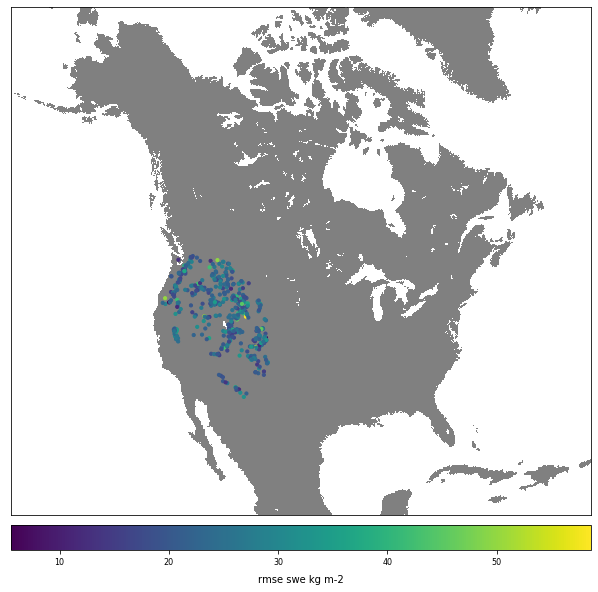

In [105]:
##################################
######## CREATE RMSE PLOT ######## 
##################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
# m = Basemap(width=5000000,height=4000000,projection='lcc',
#             resolution='c',lat_1=45.,lat_2=55,lat_0=45,lon_0=-100.)
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
# m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
rmse = lledata['rmse'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='viridis')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=rmse, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('rmse W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(eval_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_rmse.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()												# Show plot in workspace as a check

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


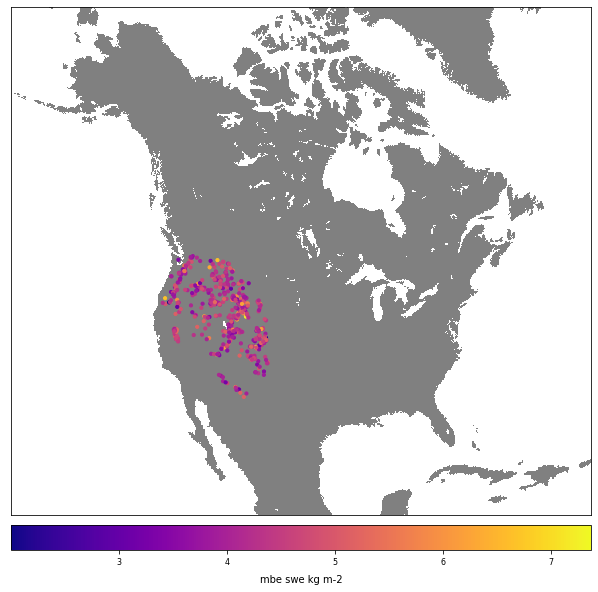

In [114]:
#################################
######## CREATE mbe PLOT ######## 
#################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
# m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
mbe = lledata['mbe'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='plasma')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=mbe, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('mbe W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(eval_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_mbe.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()												# Show plot in workspace as a check

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


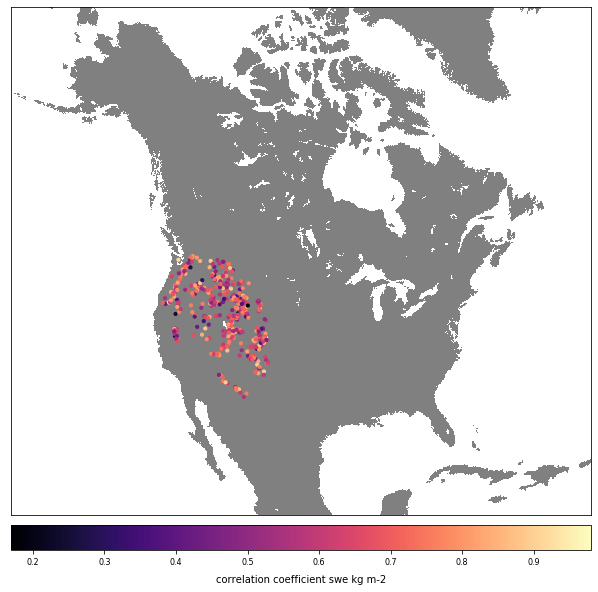

In [113]:
##################################
######## CREATE corr PLOT ######## 
##################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
# m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
r = lledata['r'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='magma')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=r, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('correlation coefficient W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(eval_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_corr.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()												# Show plot in workspace as a check

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


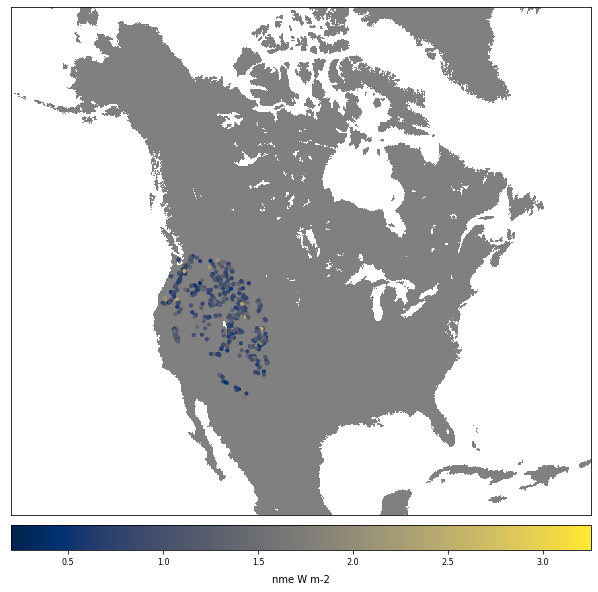

In [121]:
##################################
######## CREATE nme PLOT ######## 
##################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
# m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
nme = lledata['nme'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='cividis')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=nme, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('nme W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(eval_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_nme.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()		

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'output_path' is not defined

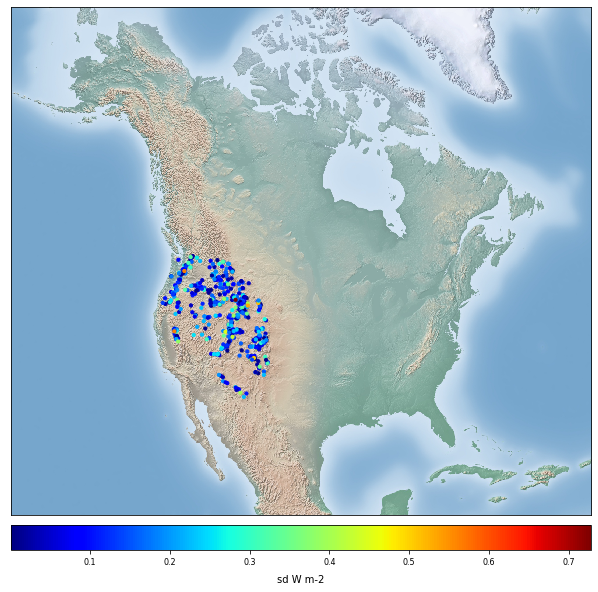

In [120]:
##################################
######## CREATE sd PLOT ######## 
##################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
sd = lledata['se'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='jet')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=sd, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('sd W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_sd.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()		

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'output_path' is not defined

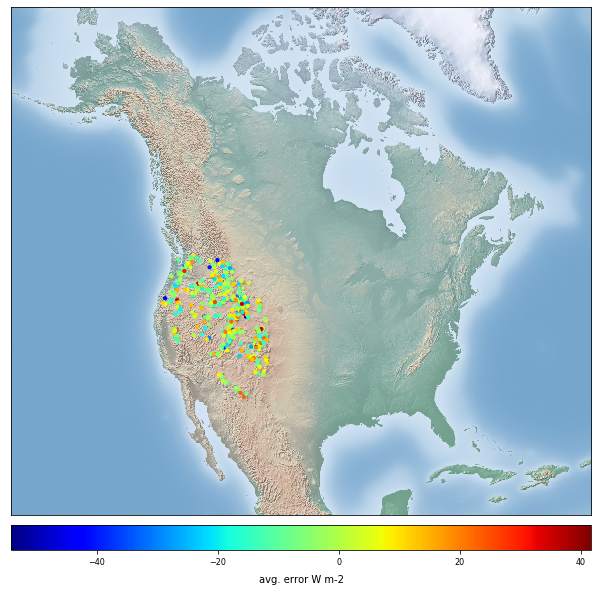

In [118]:
##################################
######## CREATE mean PLOT ######## 
##################################
# load extra modules and packages for basemap
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")	# set path to project environment
from mpl_toolkits.basemap import Basemap							# setup Lambert Conformal basemap.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10) 
# Create a lambert system basemap
m = Basemap(width=8000000,height=7000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-100.)
m.drawlsmask(land_color='grey')
m.shadedrelief()
# m.drawcoastlines() 													# draw coastlines.
os.chdir(stats_path)									# Move into directory with the statistics file
# import statistical data into the workspace
lledata = pd.read_csv("STATS_LWRAD.csv", sep=',')	# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
mean = lledata['mean'].values[:]							# Split up original .CSV into rows
lat = lledata['lat'].values[:]							# Split up original .CSV into rows
lon = lledata['lon'].values[:]							# Split up original .CSV into rows
# set glotal attributes for colormap and font
plt.rc('image', cmap='jet')							# Set RC attribute for colormap
plt.rc('font',size=8)									# Set rc attribute for font size
# flip lat and lon to work with graphing conventions for base map
xpt, ypt = m(lon, lat)									# Calcualte x and ys from lats and lons
m.scatter(xpt, ypt, c=mean, s=10)						# Create a scatter plot with basemap conventions
m.colorbar(location='bottom')							# Include a colorbar
plt.xlabel('avg. error W m-2', labelpad=60, fontsize=10)			# Add xlabel to plot
# CD and save figure to a pdf file
os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
plt.savefig('snotel_mean.pdf', dpi=300, bbox_inches='tight')	# Save fig as a PDF
plt.show()		

In [906]:
# -*- coding: utf-8 -*-
# Layer plotting for SUMMA output

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import matplotlib.dates as mdates
from scipy.interpolate import interp1d
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator


test_length=10

for z in range(test_length):    
    # Open the SUMMA output file
    os.chdir(summaData_path)													# Change directory into the folder that will contain SUMMA output files

    isFile = os.path.isfile(summafile[z])
    if isFile==True:   
        summaFILE = nc4.Dataset(summafile[z], 'r')								# Open a netCDF file (choose any station)
        
        SWE_SUMMA = summaFILE.variables['scalarSWE']							# Open snow water equivalent variable and make it == to SWE
        SSD_SUMMA = summaFILE.variables['scalarSnowDepth']						# Open snow depth variable and make it == to SDD         
        STSW_SUMMA = summaFILE.variables['scalarTotalSoilWat']					# Open total soil water variable variable
        STR_SUMMA = summaFILE.variables['scalarTotalRunoff_mean']				# Open variable
        LH_SUMMA = summaFILE.variables['scalarLatHeatTotal_mean']				# Open variable
        ET_SUMMA = summaFILE.variables['scalarTotalET_mean']					# Open variable
        IM_SUMMA = summaFILE.variables['scalarInfiltration_mean']				# Open variable
        SDM_SUMMA = summaFILE.variables['scalarSoilDrainage_mean']				# Open variable      
        AS_SUMMA = summaFILE.variables['scalarAquiferStorage']					# Open variable 
        BF_SUMMA = summaFILE.variables['scalarAquiferBaseflow_mean']			# Open variable
        SS_SUMMA = summaFILE.variables['scalarSnowSublimation_mean']			# Open variable
        SBF_SUMMA = summaFILE.variables['scalarSoilBaseflow_mean']				# Open variable
        RPM_SUMMA = summaFILE.variables['scalarRainPlusMelt_mean']				# Open variable
        TEMP_SUMMA = summaFILE.variables['mLayerTemp']							# Open variable
        mICE_SUMMA = summaFILE.variables['mLayerVolFracIce']					# Open variable
        mWAT_SUMMA = summaFILE.variables['mLayerVolFracWat']					# Open variable
        
        SWE_length = len(SWE_SUMMA)												# Calculate length of date to make sure it's sufficient
        
        if SWE_length==9479:
            # Open the SNOTEL output file
            os.chdir(snotelData_path)								# Change directory into the folder that will contain SUMMA output files
            swedata = pd.read_csv(swefile[z], sep=',')				# Use pandas read_csv function to declare a variable = to a .csv file with a ; delimiter 
            start=124												# declare variable = to the time corresponding to the start of time3 timeseries
            finish=519												# declare variable = to the time corresponding to the end of time3 timeseries
            SWE_SNOTEL = swedata['SWE'].values[start:finish]		# Extract data string as time1 variable					
            SSD_SNOTEL = swedata['Sdepth'].values[start:finish]/100	# Extract the snoTEL station Id number 
            
            # CREATE a timestamp for SUMMA data that can be plotted
            startdate = date(1990,1,1)								# Declare a start date the is used in all SUMMA simulations
            date1 = date(2017,8,1)									# Declare a variable == to the time of the start of the SUMMA simulation
            date2 = date(2018,9,1)									# Declare a variable == to the time of the end of the SUMMA simulation
            time1 = (date1-startdate).days							# Calculate the time difference in days between the start of simulation and startdate		
            time2 = (date2-startdate).days							# Calculate the time difference between the end of simulation and startdate
            int_time1 = int(time1)*24								# Multiply this difference by 24 and add the left over hours in the day to convert to total hours
            int_time2 = int(time2)*24								# Multiply this difference by 24 and add the left over hours in the day to convert to total hou
            timeSUMMA = np.arange(int_time1, int_time2)/24			# Arrange a time-series with these two dates and divide by 24 to get a fractional day 
            timeSNOTEL = np.arange(int(time1), int(time2))/24		# Arrange a time-series with these two dates and divide by 24 to get a fractional day 
            date_SUMMA=len(timeSUMMA[1:len(timeSUMMA)-24])			# Calculate the length of this time-series with an off-set to ensure conformance with original data
            date_SNOTEL=len(timeSNOTEL[1:len(timeSNOTEL)])			# Calculate the length of this time-series with an off-set to ensure conformance with original data

            base=datetime.datetime(2017,8,1,1,0)					# Declare a base time in order to create a date string that corresponds to the known time-series
            dates_SUMMA = np.array([base + datetime.timedelta(hours=(1 * i)) for i in range(date_SUMMA)]) # Create a date string time series for using as an x axis
            dates_SNOTEL = np.array([base + datetime.timedelta(days=(1 * i)) for i in range(date_SNOTEL)]) # Create a date string time series for using as an x axis 
            
            plt.rc('image', cmap='jet')								# Set RC attribute for colormap
            plt.rc('font',size=8)									# Set rc attribute for font size
            
            ####### PLOT FIG 1 #######
            
            fig, ax = plt.subplots(1, 1, figsize=(12, 16))			# Initiate the creation of a figure

            plt.subplot(311)										# Create the first subplot
            ax=plt.plot(dates_SUMMA, LH_SUMMA, 'k--', linewidth=1, markersize=8, label='SUMMA')	# Plot snow depth information from SUMMA
#             ax=plt.plot(dates_SNOTEL, SSD_SNOTEL, 'r.', linewidth=2, markersize=8, label='snoTEL')	# Plot snow depth information from snoTEL
#             plt.legend(loc='upper left', shadow=False, fontsize='12')	# Create a legend in the upper left
            plt.ylabel('Latent heat canopy-atmosphere W m-2', fontsize=12)					# Set ylabel = to snow depth m
            plt.title(summafile[z], fontsize=14)					# Create large font header
            fig.subplots_adjust(hspace=0.2)							# Adujust head space on the top fig (doesn't do much)

            plt.subplot(312)										# Create the second subplot
            ax=plt.plot(dates_SUMMA, ET_SUMMA, 'k--',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('Evapotranspiration kg m-2 s-1', fontsize=12)	# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplots

            plt.subplot(313)										# Create the second subplot
            ax=plt.plot(dates_SUMMA[3:SWE_len], STR_SUMMA[3:SWE_len], 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('total runoff m s-1', fontsize=12)	# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplot
            
            os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
            outPDF = 'laugh1_'										# Create a name for output figure
            outPDF += str(z+1) 										# Create a name for output figure
            outPDF += '.pdf'										# Create a name for output figure
            plt.tight_layout()										# Use command to make axis tight
            plt.savefig(outPDF, dpi=300)							# Save the figure to the new name
#             plt.show()		
            plt.close()												# Close this figure
            
            
            ####### PLOT FIG 2 #######
            
            fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))			# Initiate the creation of a figure

            plt.subplot(311)										# Create the first subplot
            ax=plt.plot(dates_SUMMA, IM_SUMMA, 'k-', linewidth=1, markersize=8, label='SUMMA')	# Plot snow depth information from SUMMA
#             ax=plt.plot(dates_SNOTEL, SSD_SNOTEL, 'r.', linewidth=2, markersize=8, label='snoTEL')	# Plot snow depth information from snoTEL
#             plt.legend(loc='upper left', shadow=False, fontsize='12')	# Create a legend in the upper left
            plt.ylabel('soil infiltration m s-1', fontsize=12)		# Set ylabel = to snow depth m
            plt.title(summafile[z], fontsize=14)					# Create large font header
            fig.subplots_adjust(hspace=0.2)							# Adujust head space on the top fig (doesn't do much)

            plt.subplot(312)										# Create the second subplot
            ax=plt.plot(dates_SUMMA[3:SWE_len], SDM_SUMMA[3:SWE_len], 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('soil drainage m s-1', fontsize=12)			# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplots

            plt.subplot(313)										# Create the second subplot
            ax=plt.plot(dates_SUMMA, STSW_SUMMA, 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('total soil water kg m-2', fontsize=12)	# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplots

            
            os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
            outPDF = 'laugh2_'										# Create a name for output figure
            outPDF += str(z+1) 										# Create a name for output figure
            outPDF += '.pdf'										# Create a name for output figure
            plt.tight_layout()										# Use command to make axis tight
            plt.savefig(outPDF, dpi=300)							# Save the figure to the new name
#             plt.show()		
            plt.close()												# Close this figure
            
            
            ####### PLOT FIG 3 #######
                
            fig, ax2 = plt.subplots(1, 1, figsize=(12, 12))			# Initiate the creation of a figure

            plt.subplot(311)										# Create the second subplot
            ax2=plt.plot(dates_SUMMA[3:SWE_len], AS_SUMMA[3:SWE_len], 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('depth between aquifer water and soil m', fontsize=12)			# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplot
            
            plt.subplot(312)										# Create the second subplot
            ax2=plt.plot(dates_SUMMA[3:SWE_len], BF_SUMMA[3:SWE_len], 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('base flow from aquifer m s-1', fontsize=12)			# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplot
            
            plt.subplot(313)										# Create the second subplot
            ax2=plt.plot(dates_SUMMA, SBF_SUMMA, 'k-',linewidth=2, markersize=8)	# Plot the SUMMA swe dat
#             ax=plt.plot(dates_SNOTEL, SWE_SNOTEL, 'r.',linewidth=2, markersize=8)	# Plot the Swe data from SNOTEL
            plt.xlabel('time', fontsize=12)							# Set xlabel = to time only on the bottom figure
            plt.ylabel('baseflow from the soil m s-1', fontsize=12)			# Set ylabel = to snow water equivalent units
            fig.subplots_adjust(hspace=0.2)							# make a little extra space between the subplot
            
            os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
            outPDF = 'laugh3_'										# Create a name for output figure
            outPDF += str(z+1) 										# Create a name for output figure
            outPDF += '.pdf'										# Create a name for output figure
            plt.tight_layout()										# Use command to make axis tight
            plt.savefig(outPDF, dpi=300)							# Save the figure to the new name
#             plt.show()		
            plt.close()												# Close this figure
            
            
            ####### PLOT FIG 4 #######
            
#             fig, ax = plt.subplots(2, 1, figsize=(12, 4))			# Initiate the creation of a figure

#             fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 4))
            
            mld = [0.0125,0.0125,0.025,0.05,0.1,0.1,0.1,0.1]			# Declare a time-series that gives the depth of each soil layer
            ilh=[0,0.0125,0.025,0.05,0.1,0.2,0.3,0.4,0.5]				# Declare a time-series that gives the depth at the bottom of each layer 
            base=0														# Declare an arbritary counting variable that gives the depth of the midpoint of each soil layer at a fixed width
            xnew=[0,0,0,0,0,0,0,0]										# Declare an empty xnew parameter that will be initiallized with the equal widths
            xx=[0,0,0,0,0,0,0,0]										# Declare an xx soil depth parameter that gives the middle of the existing uneven layers
            for i in range (len(mld)):									# Iterate through layer
                xx[i]=(mld[i]/2)+base									# Caluclate xx using the existing layer depths and thicknesses
                base=base+mld[i]										# Calculate a new base at each later iteration
                xnew[i]=0.0+(i+1)*0.06									# Calculate the xnew for each layer
                
            TEMP1_SUMMA=np.squeeze(TEMP_SUMMA)							# remove redundant dimension from m layer temperature variable
            TEMP2_SUMMA=np.rot90(TEMP1_SUMMA,1)							# rotate the dimensions so they will plot correctly
            mICE1_SUMMA=np.squeeze(mICE_SUMMA)							# remove redundant dimension from m layer ice variable
            mICE2_SUMMA=np.rot90(mICE1_SUMMA,1)							# rotate the dimensions so they will plot correctly
            mWAT1_SUMMA=np.squeeze(mWAT_SUMMA)							# remove redundant dimension from m layer water variable
            mWAT2_SUMMA=np.rot90(mWAT1_SUMMA,1)							# rotate the dimensions so they will plot correctly
            
            for i in range(len(TEMP2_SUMMA)):
                y=interp1d(xx,TEMP2_SUMMA[:,i],fill_value="extrapolate")			# Create a 1D interpolation for the temperature variable
                TEMP2_SUMMA[:,i]=y(xnew)											# Resample this variable at the xnew x values
                y=interp1d(xx,mICE2_SUMMA[:,i],fill_value="extrapolate")			# Create a 1D interpolation for the mICE variable
                mICE2_SUMMA[:,i]=y(xnew)											# Resample this variable at the xnew x values
                y=interp1d(xx,mWAT2_SUMMA[:,i],fill_value="extrapolate")			# Create a 1D interpolation for the mWAT variable
                mWAT2_SUMMA[:,i]=y(xnew)											# Resample this variable at the xnew x values
           
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(12, 12))
            
            x_lims = mdates.date2num(dates_SUMMA)												# Declare x_lims variable == to the mdates.date2num function
            im1=ax1.imshow(TEMP2_SUMMA[:,:]-273.15, extent = [x_lims[0], x_lims[len(x_lims)-1], xnew[len(xx)-1], xnew[0]], aspect='auto', origin='lower')
            ax1.xaxis_date()																	# We tell Matplotlib that the x-axis is filled with datetime data, 
            date_format = mdates.DateFormatter('%y/%m')											# Declare a date format that shows year and month
            ax1.xaxis.set_major_formatter(date_format)											# Implement this date format
            divider1 = make_axes_locatable(ax1)
            cax1 = divider1.append_axes("right", size="4%", pad=0.1)
            cbar1 = plt.colorbar(im1, cax=cax1)													# insert a colorbar
            cbar1.set_label('soil temperature °C',size=8, labelpad=10, rotation=270)
            ax1.set_title(summafile[z], fontsize=10)											# Create large font header
            fig.subplots_adjust(hspace=0.2)														# Adjust head space on the top fig (doesn't do much)
            fig.autofmt_xdate()																	# Add an autoformat statement that turns text on a diagonal

            im2=ax2.imshow(mICE2_SUMMA[:,:], extent = [x_lims[0], x_lims[len(x_lims)-1], xnew[len(xx)-1], xnew[0]], aspect='auto', origin='lower')
            ax2.xaxis_date()																		# We tell Matplotlib that the x-axis is filled with datetime data, 
            date_format = mdates.DateFormatter('%y/%m')											# Declare a date format that shows year and month
            ax2.xaxis.set_major_formatter(date_format)											# Implement this date format
            divider2 = make_axes_locatable(ax2)
            cax2 = divider2.append_axes("right", size="4%", pad=0.1)
            cbar2 = plt.colorbar(im2, cax=cax2)																	# insert a colorbar
            cbar2.set_label('soil ice content %/%',size=8, labelpad=10, rotation=270)
            ax2.set_ylabel('soil depth m', fontsize=8)												# Set ylabel = to snow depth m
            fig.subplots_adjust(hspace=0.2)														# Adjust head space on the top fig (doesn't do much)
            fig.autofmt_xdate()																	# Add an autoformat statement that turns text on a diagonal
       
            im3=ax3.imshow(mWAT2_SUMMA[:,:], extent = [x_lims[0], x_lims[len(x_lims)-1], xnew[len(xx)-1], xnew[0]], aspect='auto', origin='lower')
            ax3.xaxis_date()																		# We tell Matplotlib that the x-axis is filled with datetime data, 
            date_format = mdates.DateFormatter('%y/%m')											# Declare a date format that shows year and month
            ax3.xaxis.set_major_formatter(date_format)											# Implement this date format
            divider3 = make_axes_locatable(ax3)
            cax3 = divider3.append_axes("right", size="4%", pad=0.1)
            cbar3 = plt.colorbar(im3, cax=cax3)																	# insert a colorbar
            cbar3.set_label('soil water content %/%',size=8, labelpad=10, rotation=270)
#             ax3.set_xlabel('time (date)', fontsize=8)												# Set ylabel = to snow depth m
            ax3.set_ylabel('soil depth m', fontsize=8)												# Set ylabel = to snow depth m        
            fig.subplots_adjust(hspace=0.2)														# Adjust head space on the top fig (doesn't do much)
            fig.autofmt_xdate()																	# Add an autoformat statement that turns text on a diagonal

            
            im4=ax4.imshow(mWAT2_SUMMA[:,:]+mICE2_SUMMA[:,:], extent = [x_lims[0], x_lims[len(x_lims)-1], xnew[len(xx)-1], xnew[0]], aspect='auto', origin='lower')
            ax4.xaxis_date()																		# We tell Matplotlib that the x-axis is filled with datetime data, 
            date_format = mdates.DateFormatter('%y/%m')											# Declare a date format that shows year and month
            ax4.xaxis.set_major_formatter(date_format)											# Implement this date format
            divider4 = make_axes_locatable(ax4)
            cax4 = divider4.append_axes("right", size="4%", pad=0.1)
            cbar4 = plt.colorbar(im4, cax=cax4)																	# insert a colorbar
            cbar4.set_label('soil water+ice content %/%',size=8, labelpad=10, rotation=270)
            ax4.set_xlabel('time (date)', fontsize=8)												# Set ylabel = to snow depth m
            fig.subplots_adjust(hspace=0.2)														# Adjust head space on the top fig (doesn't do much)
            fig.autofmt_xdate()																	# Add an autoformat statement that turns text on a diagonal
 
            os.chdir(output_path)									# Change directory into the folder that will contain SUMMA output files
            outPDF = 'laugh4_'										# Create a name for output figure
            outPDF += str(z+1) 										# Create a name for output figure
            outPDF += '.pdf'										# Create a name for output figure
            plt.tight_layout()										# Use command to make axis tight
            plt.savefig(outPDF, dpi=300)							# Save the figure to the new name
#             plt.show()		
            plt.close()												# Close this figure
            

In [729]:
conda install pytorch torchvision -c pytorch

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
